# ATAC enrichment (in python)

In [1]:
import pandas as pd
from pybedtools import BedTool
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.8-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento
import run_memento

In [3]:
cts = ['B','T8', 'T4', 'NK', 'ncM', 'cM']

In [4]:
data_path = '/data_volume/memento/lupus/'

In [5]:
atac = pd.read_csv('/data_volume/memento/lupus/atac_enrichment/sorted_simple_atac_lineage_groups3.bed.gz', sep='\t')


### Match the memento and matrix eqtl outputs for enrichment analysis

Discrepancies are created by mis-match of gene names. TODO: standardize somehow.....

In [54]:
pop='asian'
for ct in cts:
    
    mem = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/gracie/{}_{}.csv'.format(pop,ct))\
        .add_suffix('_mem')\
        .rename(columns={'SNP_mem':'SNP', 'gene_mem':'gene'})
    meq = pd.read_csv('/data_volume/memento/lupus/full_analysis/mateqtl/outputs/{}_{}_all_hg19.csv'.format(pop,ct), sep='\t')\
        .add_suffix('_meq')\
        .rename(columns={'SNP_meq':'SNP', 'gene_meq':'gene'})
    merged = mem.merge(meq, on=['SNP', 'gene'])
    break

FileNotFoundError: [Errno 2] No such file or directory: '/data_volume/memento/lupus/full_analysis/mateqtl/outputs/asian_B_all_hg19.csv'

### Make heatmaps

In [6]:
all_result = []
for ct in cts:
    atac_result = pd.read_csv(data_path + 'atac_enrichment/gracie/eur_memento_{}.out'.format(ct), sep='\t')
    atac_result['ct'] = ct
    all_result.append(atac_result)
all_result = pd.concat(all_result)
all_result['logp'] = -np.log10(all_result['pval'])

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
heatmap = all_result.pivot('group', 'ct', 'logp')

In [8]:
# For asian
# heatmap.loc['T', 't4'] = -np.log10(0.0000000000000000000421660694040805)

In [9]:
# For euro
heatmap.loc['T', 'T4'] = -np.log10(0.00000000000000000000000000413651919363649)
heatmap.loc['nk', 'NK'] = -np.log10(0.00000000000000000034318247040364)

In [10]:
heatmap

ct,B,NK,T4,T8,cM,ncM
group,,,,,,
B,6.809808e+00,0.032972,6.155305e-02,7.922504e-01,0.645194,0.762333
EPI,7.563728e-05,0.002746,2.518711e-04,3.251767e-01,0.004496,0.031892
T,1.784822e+00,3.537351,2.638336e+01,5.340744e+00,2.109957,0.397659
myeloid,4.070450e-02,0.032670,3.270846e-01,2.036059e-01,8.514057,4.395618
nk,1.003718e-01,18.464475,1.076057e+00,8.550630e+00,0.757557,0.769119
open,1.547408e-12,0.000562,1.785949e-11,2.284138e-07,0.006292,1.661002
progenitor,7.717484e-01,1.565430,4.048995e-01,2.514145e-01,2.126744,0.284475
thymocyte,8.881697e-02,0.034758,1.503550e-01,1.891045e-01,0.071579,0.767234


Text(0.5, 1.0, 'European')

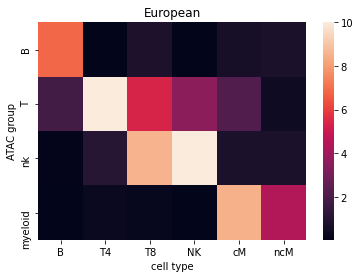

In [12]:
sns.heatmap(heatmap.loc[['B', 'T', 'nk', 'myeloid']].loc[:, ['B', 'T4', 'T8',  'NK','cM', 'ncM',]], vmax=10)
plt.ylabel('ATAC group'); plt.xlabel('cell type')
plt.title('European')

In [13]:
all_result = []
for ct in cts:
    atac_result = pd.read_csv(data_path + 'atac_enrichment/gracie/asian_memento_{}.out'.format(ct), sep='\t')
    atac_result['ct'] = ct
    all_result.append(atac_result)
all_result = pd.concat(all_result)
all_result['logp'] = -np.log10(all_result['pval'])

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
heatmap = all_result.pivot('group', 'ct', 'logp')

In [15]:
# For asian
heatmap.loc['T', 't4'] = -np.log10(0.0000000000000000000421660694040805)

In [16]:
# # For euro
# heatmap.loc['T', 'T4'] = -np.log10(0.00000000000000000000000000413651919363649)
# heatmap.loc['nk', 'NK'] = -np.log10(0.00000000000000000034318247040364)

In [17]:
heatmap

ct,B,NK,T4,T8,cM,ncM,t4
group,,,,,,,
B,9.446009,0.201449,1.152787e-02,0.000236,0.294643,2.429043,NaN
EPI,0.069438,0.016695,9.574018e-01,0.379966,0.041539,0.001686,NaN
T,0.410748,1.929972,inf,5.156759,0.006744,1.411975,19.375037
myeloid,0.004008,0.000050,1.647548e-07,0.024558,11.349207,8.334943,NaN
nk,2.148783,6.150417,2.912448e-01,2.891361,0.002267,2.564646,NaN
open,-0.000000,0.000688,1.626796e-01,0.110856,0.019771,0.001514,NaN
progenitor,0.731325,0.060398,2.350628e+00,0.784351,6.172507,1.194904,NaN
thymocyte,0.282672,0.042491,4.711996e-01,0.585906,0.013512,1.305937,NaN


Text(0.5, 1.0, 'Asian')

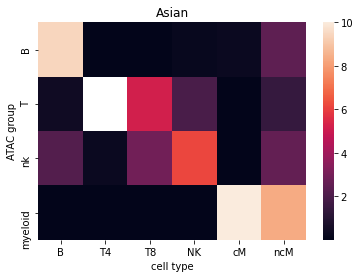

In [19]:
sns.heatmap(heatmap.loc[['B', 'T', 'nk', 'myeloid']].loc[:, ['B', 'T4', 'T8',  'NK','cM', 'ncM',]], vmax=10)
plt.ylabel('ATAC group'); plt.xlabel('cell type')
plt.title('Asian')

### Compare Gracie's eqtls, matrix eqtl, and memento

In [6]:
all_available_snps = pd.read_csv('/data_volume/memento/lupus/full_analysis/mateqtl/inputs/asian_genos.tsv', sep='\t')

In [47]:
gracie = pd.read_csv(data_path + 'gracie_eqtls/nk_metasoft_out.txt', sep='\t', skiprows=1, header=None).iloc[:, :3]
memento = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/gracie/asian_NK.csv')
mateqtl = pd.read_csv('/data_volume/memento/lupus/full_analysis/mateqtl/outputs/asian_NK_all.csv', sep='\t')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
mateqtl_gene_loc = pd.read_csv('/data_volume/memento/lupus/full_analysis/mateqtl/inputs/geneloc_tss_hg19.txt', sep='\t')

In [37]:
mateqtl_gene_loc.query('geneid == "FAM192A"')

,geneid,chr,s1,s2


In [48]:
gracie_pairs = set(gracie.iloc[:, 0].tolist())
memento_pairs = set((memento['SNP'] + '_' + memento['gene']).tolist())
mateqtl_pairs = set((mateqtl['SNP'] + '_' + mateqtl['gene']).tolist())

In [49]:
len(gracie_pairs & mateqtl_pairs)

215793

In [50]:
len(mateqtl_pairs)

827413

In [40]:
gracie.columns = ['name', 'chr', 'p-value']
gracie['gene'] = gracie['name'].str.split('_').str[-1]

In [44]:
gracie.dropna()

,name,chr,p-value,gene
0,10:100043981_PYROXD2,2,0.499939,PYROXD2
1,10:100044928_PYROXD2,3,0.481351,PYROXD2
2,10:100045000_PYROXD2,3,0.333619,PYROXD2
3,10:100045147_PYROXD2,3,0.498166,PYROXD2
4,10:100045166_PYROXD2,2,0.873178,PYROXD2
...,...,...,...,...
3379627,9:99802796_HIATL2,2,0.609609,HIATL2
3379628,9:99804997_HIATL2,2,0.918560,HIATL2
3379629,9:99805079_HIATL2,2,0.609609,HIATL2
3379630,9:99806169_HIATL2,2,0.609609,HIATL2


In [45]:
gracie.query('gene == "FAM192A"').dropna()

,name,chr,p-value,gene
874360,16:57089130_FAM192A,3,0.241322,FAM192A
874363,16:57089959_FAM192A,3,0.292241,FAM192A
874369,16:57090666_FAM192A,3,0.137841,FAM192A
874372,16:57090858_FAM192A,3,0.185542,FAM192A
874378,16:57091334_FAM192A,3,0.703152,FAM192A
...,...,...,...,...
875506,16:57252581_FAM192A,3,0.834951,FAM192A
875515,16:57256949_FAM192A,3,0.967575,FAM192A
875527,16:57261146_FAM192A,3,0.660629,FAM192A
875542,16:57272174_FAM192A,3,0.778900,FAM192A


In [51]:
list(gracie_pairs - mateqtl_pairs)[:5]

['4:155425156_PLRG1',
 '12:54875370_NCKAP1L',
 '6:42956746_KLC4',
 '6:511080_EXOC2',
 '1:118135188_FAM46C']

In [29]:
len(memento_pairs & mateqtl_pairs)

693838

In [21]:
joined = memento.merge(mateqtl, on=['SNP', 'gene'], suffixes=('_mem', '_meq'))

In [22]:
joined.head(5)

,SNP,gene,statistic,p.value,FDR_mem,beta_mem,beta_meq,t-stat,p-value,FDR_meq
0,1:839103,NOC2L,0.657470,0.511113,0.966698,0.002805,0.009298,1.704009,0.094128,0.764935
1,1:961464,NOC2L,0.011876,0.990527,0.999417,0.000045,-0.002722,-0.511359,0.611184,0.959118
2,1:959169,NOC2L,0.310125,0.756709,0.987386,0.001081,0.005274,1.016637,0.313860,0.890783
3,1:833927,NOC2L,0.508080,0.611433,0.977901,0.002262,0.010230,1.697418,0.095375,0.765596
4,1:853239,NOC2L,0.605859,0.544764,0.970924,0.002950,0.008813,1.301135,0.198737,0.847948


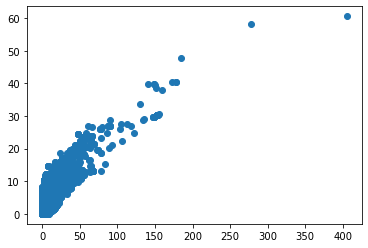

In [19]:
plt.scatter(-np.log(joined['p.value']), -np.log(joined['p-value']))

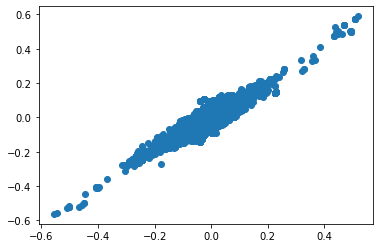

In [15]:
plt.scatter(joined['beta_x'], joined['beta_y'])

In [10]:
memento.head(5)

,SNP,gene,statistic,p.value,FDR,beta
0,1:852037,LINC00115,-0.158421,0.874351,0.993827,-0.000157
1,1:836924,LINC00115,1.768985,0.077123,0.737361,0.002409
2,1:754334,LINC00115,-1.800973,0.071708,0.724811,-0.001807
3,1:850218,LINC00115,-0.158421,0.874351,0.993827,-0.000157
4,1:787399,LINC00115,-2.016791,0.043726,0.637237,-0.002023


In [12]:
mateqtl.shape

(878466, 6)

In [13]:
memento.shape

(2047501, 6)

In [14]:
gracie.shape

(3379632, 3)

### Sanity check gracie's eqtls

In [81]:
gracie_nk = pd.read_csv(data_path + 'gracie_eqtls/nk_metasoft_out.txt', sep='\t', skiprows=1, header=None).iloc[:, :3]

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
gracie_nk.columns = ["RSID","STUDY","p.value"]

In [83]:
gracie_nk['SNP'] = gracie_nk['RSID'].str.split('_').str[0]
gracie_nk['gene'] = gracie_nk['RSID'].str.split('_').str[1]

gracie_nk['chr'] = 'chr'+gracie_nk['SNP'].str.split(':').str[0]
gracie_nk['pos'] = gracie_nk['SNP'].str.split(':').str[1]

In [38]:
merged.head(5)

,RSID,STUDY,p.value,chr,SNP,gene,pos,end,distance
0,10:100043981_PYROXD2,2,0.499939,chrchr10,chr10:100043981,chrPYROXD2,100043981,100043982,-1
1,10:100044928_PYROXD2,3,0.481351,chrchr10,chr10:100044928,chrPYROXD2,100044928,100044929,-1
2,10:100045000_PYROXD2,3,0.333619,chrchr10,chr10:100045000,chrPYROXD2,100045000,100045001,-1
3,10:100045147_PYROXD2,3,0.498166,chrchr10,chr10:100045147,chrPYROXD2,100045147,100045148,-1
4,10:100045166_PYROXD2,2,0.873178,chrchr10,chr10:100045166,chrPYROXD2,100045166,100045167,-1


In [40]:
c.head(5)

,chr,pos,end,distance
0,chr1,801467,801468,801468
1,chr1,801467,801468,801468
2,chr1,801467,801468,801468
3,chr1,1498152,1498153,1498153
4,chr1,1498152,1498153,1498153


In [43]:
gracie_nk['logp'] = -np.log10(gracie_nk['p.value'])

In [42]:
gracie_nk.head(5)

,RSID,STUDY,p.value,SNP,gene,chr,pos
0,10:100043981_PYROXD2,2,0.499939,10:100043981,PYROXD2,chr10,100043981
1,10:100044928_PYROXD2,3,0.481351,10:100044928,PYROXD2,chr10,100044928
2,10:100045000_PYROXD2,3,0.333619,10:100045000,PYROXD2,chr10,100045000
3,10:100045147_PYROXD2,3,0.498166,10:100045147,PYROXD2,chr10,100045147
4,10:100045166_PYROXD2,2,0.873178,10:100045166,PYROXD2,chr10,100045166


In [85]:
memento_nk = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/hits/{}_{}.csv'.format('asian', 'NK'))

In [86]:
memento_nk.head(5)

,SNP,gene,statistic,p.value,FDR,beta
0,1:1049950,NOC2L,0.094687,0.924587,0.993168,0.000306
1,1:1042927,NOC2L,0.094687,0.924587,0.993168,0.000306
2,1:1017587,NOC2L,-0.427366,0.669130,0.963421,-0.002109
3,1:957898,NOC2L,-0.173150,0.862559,0.987094,-0.000794
4,1:960941,NOC2L,-0.511044,0.609324,0.952418,-0.002320


In [68]:
memento_nk['logp'] = -np.log10(memento_nk['p.value'])

In [57]:
memento_nk.shape

(2001628, 16)

In [48]:
gracie_nk.shape

(3379632, 8)

In [69]:
combined = gracie_nk.merge(memento_nk, on=['SNP', 'gene'], how='inner', suffixes=('_g', '_m'))

In [70]:
combined.shape

(237235, 13)

In [52]:
274485/1156545

0.23733188073097025

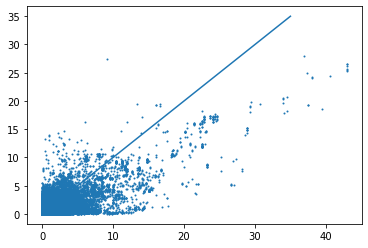

In [72]:
plt.scatter(combined['logp_g'], combined['logp_m'], s=1)
plt.plot([0, 35], [0, 35])

In [80]:
enrichment_result = []

for group in atac.group.drop_duplicates():

        atac_group = atac.query('group == "{}"'.format(group))

        snp_locs = combined[['chr', 'pos']].copy()
        snp_locs['end'] = snp_locs['pos'].astype(int)+1

        a = BedTool.from_dataframe(snp_locs).sort()
        b = BedTool.from_dataframe(atac_group).sort()

        c = a.intersect(b)

        c = c.to_dataframe().iloc[:, [0, 1, 2, -1]]
        c.columns=['chr', 'pos', 'end', 'distance']

        c['pos'] = c['pos'].astype(str)
        c['group'] = group

        merged = combined.merge(c, on=['chr', 'pos'], how='left')

        merged['in_peak'] = merged['group'] == group

        pv = stats.mannwhitneyu(merged.query('in_peak')['p.value_g'], merged.query('~in_peak')['p.value_g'])[1]

        enrichment_result.append((group, pv))
        print((group, pv))

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('B', 6.203809260773869e-61)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('EPI', 1.0050134298401234e-08)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('myeloid', 2.5603103625947414e-05)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('nk', 1.9377851542003767e-07)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('open', 5.947209871854974e-26)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('progenitor', 9.904871682344151e-09)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('T', 0.040821239136766024)


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


('thymocyte', 0.16700898110771456)


In [94]:
enrichment_result = []
for pop in ['eur', 'asian']:

    for ct in cts:
        print(pop, ct)

        result = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/hits/{}_{}.csv'.format(pop, ct))
        result['chr'] = 'chr'+result['SNP'].str.split(':').str[0]
        result['pos'] = result['SNP'].str.split(':').str[1]

        for group in atac.group.drop_duplicates():

            atac_group = atac.query('group == "{}"'.format(group))

            snp_locs = result[['chr', 'pos']].copy()
            snp_locs['end'] = snp_locs['pos'].astype(int)+1

            a = BedTool.from_dataframe(snp_locs).sort()
            b = BedTool.from_dataframe(atac_group).sort()

            c = a.closest(b, d=True)

            c = c.to_dataframe().iloc[:, [0, 1, 2, -1]]
            c.columns=['chr', 'pos', 'end', 'distance']

            c['pos'] = c['pos'].astype(str)

            merged = result.merge(c, on=['chr', 'pos'], how='left')

#             merged['in_peak'] = merged['group'] == group

#             pv = stats.mannwhitneyu(-np.log(merged.query('in_peak')['p.value']), -np.log(merged.query('~in_peak')['p.value']))[1]

            enrichment_result.append((pop, ct, group, pv))
            break
        break
    break
# pd.DataFrame(enrichment_result, columns=['pop', 'ct', 'group', 'pv']).to_csv('memento_enrichment.csv', index=False)

eur B


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [95]:
merged.shape

(2152486, 10)

In [101]:
temp = merged.sort_values('distance').drop_duplicates(['SNP', 'gene'])

In [102]:
temp.shape

(1113020, 10)

In [103]:
temp.head(5)

,SNP,gene,statistic,p.value,FDR,beta,chr,pos,end,distance
915429,5:172941190,ERGIC1,-1.100884,0.271981,0.827995,-0.003304,chr5,172941190,172941191,0
198736,19:42022289,POU2F2,0.662542,0.508303,0.919221,0.005694,chr19,42022289,42022290,0
198840,19:42308552,DEDD2,-0.181343,0.856589,0.981817,-0.000472,chr19,42308552,42308553,0
198846,19:42308440,DEDD2,-0.181343,0.856589,0.981817,-0.000472,chr19,42308440,42308441,0
198895,19:42308552,PAFAH1B3,1.177711,0.239120,0.807074,0.002246,chr19,42308552,42308553,0


In [98]:
temp.shape

(775642, 10)

In [99]:
c.shape

(1113022, 4)

In [100]:
result.shape

(1113020, 8)

In [91]:
snp_locs.shape

(1113020, 3)

In [89]:
c.shape

(1113022, 8)

In [88]:
c.head(5)

,chrom,start,end,name,score,strand,thickStart,thickEnd
0,chr1,845635,845636,chr1,800434,801623,B,44013
1,chr1,845938,845939,chr1,800434,801623,B,44316
2,chr1,846078,846079,chr1,800434,801623,B,44456
3,chr1,846338,846339,chr1,800434,801623,B,44716
4,chr1,846398,846399,chr1,800434,801623,B,44776


In [83]:
temp.query('B').shape

(15267, 21)

In [ ]:
enrichment_result

In [64]:
enrichment_result

[('eur', 'B', 'B', 2.1967184902054426e-11)]

In [69]:
myatac = pd.read_csv(data_path + 'atac_enrichment/snps_peaks.csv', index_col=0)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [72]:
temp = merged.merge(myatac, on='SNP')

In [77]:
temp2 = temp[['SNP', 'in_peak', 'B']]

In [84]:
stats.mannwhitneyu(temp.query('B')['statistic'], temp.query('~B')['statistic'] )

MannwhitneyuResult(statistic=8431555371.0, pvalue=0.4778660469271494)

In [80]:
temp2.query('in_peak == B').shape

(1120102, 3)

In [ ]:
temp.head(5)

In [68]:
merged.head(5)

,SNP,gene,statistic,p.value,FDR,beta,chr,pos,end,group,in_peak
0,1:845938,NOC2L,-0.157207,0.875140,0.985348,-0.000590,chr1,845938,NaN,NaN,False
1,1:1006990,NOC2L,-0.941699,0.346348,0.864504,-0.003112,chr1,1006990,NaN,NaN,False
2,1:967658,NOC2L,0.372265,0.709701,0.960385,0.000916,chr1,967658,NaN,NaN,False
3,1:1053670,NOC2L,-1.660162,0.097107,0.649920,-0.004749,chr1,1053670,NaN,NaN,False
4,1:970215,NOC2L,-0.261016,0.794161,0.973154,-0.000668,chr1,970215,NaN,NaN,False


In [59]:
snp_locs.shape

(1113020, 3)

In [62]:
b.head(5)

chr1	800434	801623	B
 chr1	1497875	1498496	B
 chr1	1729157	1729651	B
 chr1	1777920	1779872	B
 chr1	1795343	1796694	B
 

In [63]:
a.head(5)

chr1	845938	845939
 chr1	1006990	1006991
 chr1	967658	967659
 chr1	1053670	1053671
 chr1	970215	970216
 

In [61]:
c.head(5)

,chr,pos,end,group
0,chr1,1778469,1778470,B
1,chr1,1778469,1778470,B
2,chr1,1778090,1778091,B
3,chr1,1778469,1778470,B
4,chr1,1778090,1778091,B


In [60]:
c.shape

(8185, 4)

In [ ]:
enrichment_result = []

# From gracie's atac folder
atac = pd.read_csv('/data_volume/memento/lupus/atac_enrichment/sorted_simple_atac_lineage_groups3.bed.gz', sep='\t')

for pop in ['eur']:

    for ct in ['B','T8', 'T4', 'NK', 'ncM', 'cM']:
        print(pop, ct)
        
        # Result is straight from Matrix eQTL
        result = pd.read_csv('/data_volume/memento/lupus/full_analysis/mateqtl/outputs/{}_{}_all.csv'.format(pop, ct), sep='\t')
        result['chr'] = 'chr'+result['SNP'].str.split(':').str[0]
        result['pos'] = result['SNP'].str.split(':').str[1]

        for group in atac.group.drop_duplicates():

            atac_group = atac.query('group == "{}"'.format(group))

            snp_locs = result[['chr', 'pos']].copy()
            snp_locs['end'] = snp_locs['pos'].astype(int)+1

            a = BedTool.from_dataframe(snp_locs)
            b = BedTool.from_dataframe(atac_group)

            c = b.intersect(a)

            c = c.to_dataframe()
            c.columns=['chr', 'pos', 'end', 'group']

            c['pos'] = c['pos'].astype(str)

            merged = result.merge(c, on=['chr', 'pos'], how='left')

            merged['in_peak'] = merged['group'] == group

            pv = stats.mannwhitneyu(-np.log(merged.query('in_peak')['p-value']), -np.log(merged.query('~in_peak')['p-value']))[1]

            enrichment_result.append((pop, ct, group, pv))
pd.DataFrame(enrichment_result, columns=['pop', 'ct', 'group', 'pv']).to_csv('mateqtl_enrichment.csv'.format(pop), index=False)

In [456]:
stats.mannwhitneyu(merged.query('in_peak')['p.value'], merged.query('~in_peak')['p.value'])

MannwhitneyuResult(statistic=13463559204.0, pvalue=0.005525082429981845)

### memento heatmaps

In [463]:
memento_result = pd.read_csv('memento_enrichment.csv')

In [464]:
memento_result.head(5)

,pop,ct,group,pv
0,eur,B,B,2.196718e-11
1,eur,B,EPI,3.215340e-02
2,eur,B,myeloid,2.150364e-01
3,eur,B,nk,2.539286e-01
4,eur,B,open,1.055716e-02


In [470]:
heatmap_eur = -np.log10(
    pd.pivot(memento_result.query('pop=="eur"')[['ct', 'group', 'pv']], 'ct', 'group', 'pv'))

In [471]:
heatmap_asian = -np.log10(
    pd.pivot(memento_result.query('pop=="asian"')[['ct', 'group', 'pv']], 'ct', 'group', 'pv'))

In [476]:
heatmap = (heatmap_asian+heatmap_eur)/2

<AxesSubplot:xlabel='group', ylabel='ct'>

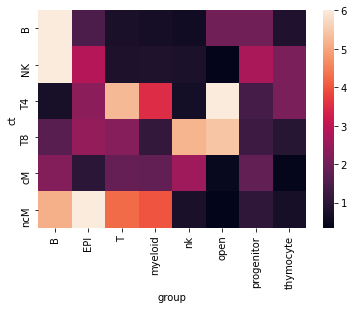

In [478]:
sns.heatmap(heatmap_eur, vmax=6)

<AxesSubplot:xlabel='group', ylabel='ct'>

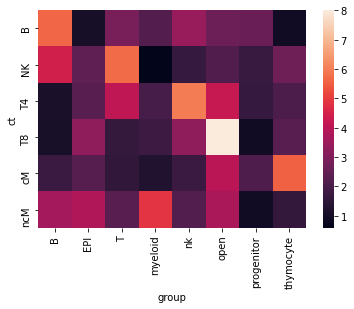

In [477]:
sns.heatmap(heatmap, vmax=8)

In [ ]:
heatmap = pd.DataFrame()

### mateqtl heatmaps

In [24]:
matqetl_result = pd.read_csv('mateqtl_enrichment.csv')

In [25]:
# heatmap_eur = -np.log10(
#     pd.pivot(memento_result.query('pop=="eur"')[['ct', 'group', 'pv']], 'ct', 'group', 'pv'))

In [26]:
heatmap_asian = -np.log10(
    pd.pivot(matqetl_result.query('pop=="eur"')[['ct', 'group', 'pv']], 'ct', 'group', 'pv'))

<AxesSubplot:xlabel='group', ylabel='ct'>

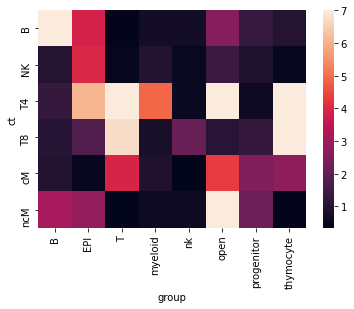

In [30]:
sns.heatmap(heatmap_asian, vmax=7)

### Cell type correlations

In [495]:
dfs = {}
pop = 'asian'
for ct in cts:
    dfs[ct] = pd.read_csv(('/data_volume/memento/lupus/full_analysis/memento/hits/{}_{}.csv'.format(pop, ct)))

In [496]:
heatmap = pd.DataFrame(index=cts, columns=cts)

In [498]:
import itertools

In [503]:
for c1, c2 in itertools.combinations(cts, 2):
    
    combined = dfs[c1].merge(dfs[c2], on=['SNP', 'gene'])
    corr = stats.spearmanr(combined['statistic_x'], combined['statistic_y'])[0]
    heatmap.loc[c1, c2] = corr
    heatmap.loc[c2, c1] = corr

In [ ]:
sns.heatmap(heatmap)

In [ ]:
combined

### ATAC preprocess

In [5]:
atac = pd.read_csv('/data_volume/memento/lupus/atac_enrichment/sorted_simple_atac_lineage_groups3.bed.gz', sep='\t')


In [6]:
atac_groups = atac.group.drop_duplicates().tolist()

In [7]:
snps = pd.read_csv(data_path + 'mateqtl_input/asian_genos.tsv', sep='\t', index_col=0)

In [8]:
snps = snps[[]].copy()

In [9]:
snps['chr'] = 'chr' + snps.index.str.split(':').str[0]
snps['pos'] = snps.index.str.split(':').str[1].astype(int)
snps['SNP'] = snps.index

In [12]:
labeled_snps = snps
for ct in atac_groups:
    print('getting atac peaks for', ct)
    atac_ct = atac.query('group == "{}"'.format(ct))
    
    df_atac = pd.concat([
        pd.DataFrame(
        {'pos': range(row['start'], row['stop']), ct:True, 'chr':row['chr']}) 
        for _, row in atac_ct.iterrows()])
    labeled_snps = labeled_snps.merge(df_atac, on=['chr', 'pos'], how='left')

getting atac peaks for B
getting atac peaks for EPI
getting atac peaks for myeloid
getting atac peaks for nk
getting atac peaks for open
getting atac peaks for progenitor
getting atac peaks for T
getting atac peaks for thymocyte


In [13]:
labeled_snps.fillna(False).to_csv(data_path + 'atac_enrichment/snps_peaks.csv')

### Perform meta analysis

In [45]:
for ct in cts:
    
    mem_asian = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/hits/{}_{}.csv'.format('asian', ct))
    mem_eur = pd.read_csv('/data_volume/memento/lupus/full_analysis/memento/hits/{}_{}.csv'.format('eur', ct))
    
    joined = mem_asian.merge(mem_eur, on='SNP', suffixes=('_asian', '_eur'))
    joined['weight_asian'] = (joined['statistic_asian']/joined['beta_asian'])**2
    joined['weight_eur'] = (joined['statistic_eur']/joined['beta_eur'])**2
    joined['beta'] = (joined['beta_asian']*joined['weight_asian'] + joined['beta_eur']*joined['weight_eur'])/(joined['weight_asian']+joined['weight_eur'])
    joined['se'] = np.sqrt(1/(joined['weight_asian']+joined['weight_eur']))
    joined['pvalue'] = stats.norm.sf(joined['beta'].abs(), loc=0, scale=joined['se'])*2
    
    joined.to_csv(data_path + 'full_analysis/memento/meta_{}.csv'.format(ct), index=False)

### Perform enrichment with my peaks

In [46]:
atac = pd.read_csv(data_path + 'atac_enrichment/snps_peaks.csv', index_col=0)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [47]:
atac['pos'] = atac['pos'].astype(str) 

In [8]:
enrichment_result = []
for pop in ['eur', 'asian']:

    for ct in cts:
        print(pop, ct)

        result = pd.read_csv(data_path + 'full_analysis/memento/meta_{}.csv'.format(ct))        
        
        result = result.merge(atac, on='SNP')

        for group in atac.columns[3:]:
            pv = stats.mannwhitneyu(result.query('{}'.format(group))['p.value'], result.query('~{}'.format(group))['p.value'])
            enrichment_result.append((pop, ct, group, pv))


eur B
eur T8
eur T4
eur NK
eur ncM
eur cM
asian B
asian T8
asian T4
asian NK
asian ncM
asian cM


In [10]:
memento_result = pd.DataFrame(enrichment_result, columns=['pop', 'ct', 'group', 'pv'])

In [15]:
memento_result['pv'] = memento_result['pv'].apply(lambda x: x[1])

<AxesSubplot:xlabel='group', ylabel='ct'>

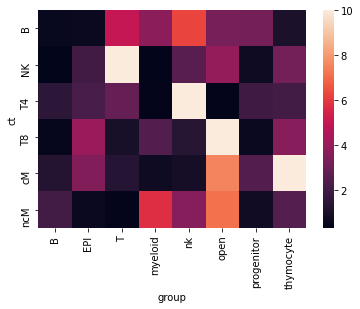

In [474]:
sns.heatmap(heatmap_asian, vmax=10)

### meta analysis enrichment

In [48]:
enrichment_result = []
for ct in cts:
    print(ct)

    result = pd.read_csv(data_path + 'full_analysis/memento/meta_{}.csv'.format(ct))        

    result = result.merge(atac, on='SNP')

    for group in atac.columns[3:]:
        pv = stats.mannwhitneyu(result.query('{}'.format(group))['pvalue'], result.query('~{}'.format(group))['pvalue'])[1]
        enrichment_result.append((ct, group, pv))
memento_result = pd.DataFrame(enrichment_result, columns=['ct', 'group', 'pv'])

B
T8
T4
NK
ncM
cM


### ATAC debug (focus on NK cells)

In [2]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

import argparse

import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.8-py3.8.egg')
import memento

In [1]:
ct = 'NK'

In [4]:
pop = 'eur'

In [ ]:
data_path  = '/data_volume/memento/lupus/'

pos = pd.read_csv(data_path + 'mateqtl_input/{}_genos.tsv'.format(pop), sep='\t', index_col=0)
cov = pd.read_csv(data_path + 'mateqtl_input/{}_mateqtl_cov.txt'.format(pop), sep='\t', index_col=0).T


In [6]:
gene_snp_pairs = pd.read_csv(data_path +'mateqtl_input/{}/gene_snp_pairs_{}.csv'.format(pop, '100kb')).query('rsid in @pos.index')


In [7]:
gene_snp_pairs.head(5)

,gene,rsid
1,OR4F16,1:706368
2,OR4F16,1:729679
6,OR4F16,1:752566
7,OR4F16,1:752721
8,OR4F16,1:753405


In [8]:
myatac = pd.read_csv(data_path + 'atac_enrichment/snps_peaks.csv', index_col=0)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
gene_snp_pairs_atac = gene_snp_pairs.merge(myatac[['SNP', 'nk']].rename(columns={'SNP':'rsid'}), on='rsid', how='left')

In [15]:
sampled_gene_snp_pairs = pd.concat([gene_snp_pairs_atac.query('nk'), gene_snp_pairs_atac.query('~nk').sample(n=18000)])

In [16]:
sampled_gene_snp_pairs

,gene,rsid,nk
614,FAM41C,1:944564,True
799,AL645608.2,1:944564,True
1014,SAMD11,1:944564,True
1253,NOC2L,1:944564,True
1463,KLHL17,1:944564,True
...,...,...,...
269228,THEM5,1:151760048,False
4834727,MICB,6:31561353,False
828969,OR56A1,11:5939804,False
870179,MRGPRX3,11:18159254,False


In [56]:
adata = sc.read(data_path + 'single_cell/{}_{}.h5ad'.format(pop, ct))
adata = adata[adata.obs.ind_cov.isin(pos.columns)].copy()

adata.obs['capture_rate'] = 0.1
memento.setup_memento(adata, q_column='capture_rate', trim_percent=0.1, filter_mean_thresh=0.2)
# 		adata.obs['memento_size_factor'] = 1.0
memento.create_groups(adata, label_columns=['ind_cov'])

cov_df = cov.loc[[x[3:] for x in adata.uns['memento']['groups']]]

donor_df = pos[[x[3:] for x in adata.uns['memento']['groups']]].T

In [57]:
adata.shape

(34552, 32738)

In [58]:
len(sampled_gene_snp_pairs.gene.drop_duplicates().tolist())

12655

In [59]:
memento.compute_1d_moments(adata, min_perc_group=.1, gene_list=sampled_gene_snp_pairs.gene.drop_duplicates().tolist())


In [60]:
adata.shape

(34552, 810)

In [61]:

gene_to_snp = dict(sampled_gene_snp_pairs[sampled_gene_snp_pairs.gene.isin(adata.var.index)].groupby('gene').rsid.apply(list))

memento.ht_1d_moments(
    adata, 
    covariate=cov_df,
    treatment=donor_df,
    treatment_for_gene=gene_to_snp,
    num_boot=5000, 
    verbose=1,
    num_cpus=8,
    resampling='bootstrap',
    approx=True,
    resample_rep=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   37.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 810 out of 810 | elapsed:  2.8min finished


In [62]:
nk_result = memento.get_1d_ht_result(adata)

In [63]:
nk_result = nk_result.merge(myatac[['SNP', 'nk']].rename(columns={'SNP':'tx'}))

In [64]:
stats.mannwhitneyu(nk_result.query('nk').de_pval, nk_result.query('nk').de_pval)

MannwhitneyuResult(statistic=780000.5, pvalue=0.49998893310938053)

In [65]:
nk_result['fdr'] = memento.util._fdrcorrect(nk_result['de_pval'])

In [79]:
nk_result['sig'] = nk_result['fdr'] < 0.15

In [80]:
pd.crosstab(nk_result['nk'], nk_result['sig'])

sig,False,True
nk,,
False,986,47
True,1202,47


In [86]:
np.log(nk_result.query('nk').de_pval).mean()

-1.3834762537794663

In [87]:
np.log(nk_result.query('~nk').de_pval).mean()

-1.462813356523016

<AxesSubplot:>

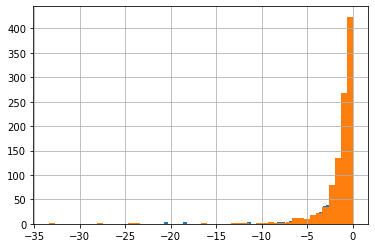

In [90]:
np.log(nk_result.query('nk').de_pval).hist(bins=50)
np.log(nk_result.query('~nk').de_pval).hist(bins=50)

In [9]:
myatac.head(5)

,chr,pos,SNP,B,EPI,myeloid,nk,open,progenitor,T,thymocyte
0,chr3,165182446,3:165182446,False,False,False,False,False,False,False,False
1,chr6,122682327,6:122682327,False,False,False,False,False,False,False,False
2,chr22,40561759,22:40561759,False,False,False,False,False,False,False,False
3,chr3,104381193,3:104381193,False,False,False,False,False,False,False,False
4,chr15,57107863,15:57107863,False,False,False,False,False,False,False,False


In [14]:
labeled_snps.shape

(3285470, 11)

In [15]:
snps.shape

(3285470, 3)

In [9]:
atac_ct = atac.query('group == "B"')

In [10]:
df_atac = pd.concat([
    pd.DataFrame(
    {'peak': range(row['start'], row['stop']), 'group': row['group'], 'chr':row['chr']}) 
    for _, row in atac_ct.iterrows()])

In [12]:
labeled_snps = snps.merge(df_atac, left_on=['chr', 'start'], right_on=['chr', 'peak'], how='left')

In [14]:
snps

,chr,start,end,SNP
CHROM:POS,,,,
3:165182446,chr3,165182446,165182447,3:165182446
6:122682327,chr6,122682327,122682328,6:122682327
22:40561759,chr22,40561759,40561760,22:40561759
3:104381193,chr3,104381193,104381194,3:104381193
15:57107863,chr15,57107863,57107864,15:57107863
...,...,...,...,...
19:45336035,chr19,45336035,45336036,19:45336035
11:77505479,chr11,77505479,77505480,11:77505479
3:185550881,chr3,185550881,185550882,3:185550881


In [15]:
labeled_snps[~labeled_snps.peak.isnull()]

,chr,start,end,SNP,peak,group
114,chr15,31522409,31522410,15:31522409,31522409.0,B
123,chr20,52511323,52511324,20:52511323,52511323.0,B
350,chr10,111755319,111755320,10:111755319,111755319.0,B
553,chr10,76060488,76060489,10:76060488,76060488.0,B
955,chr5,58859074,58859075,5:58859074,58859074.0,B
...,...,...,...,...,...,...
3284563,chr22,44585521,44585522,22:44585521,44585521.0,B
3284791,chr22,22929466,22929467,22:22929466,22929466.0,B
3285160,chr20,33992761,33992762,20:33992761,33992761.0,B
3285173,chr15,40845952,40845953,15:40845952,40845952.0,B


In [83]:
atac_ct.query('start < 7513809 & stop > 7513809')

,chr,start,stop,group
1446,chr10,7513338,7514350,B


In [80]:
df_atac.loc[7513809]

,group
peak,
7513809,B
7513809,B


In [79]:
df_atac.loc[df_atac.index.duplicated()]

,group
peak,
7513809,B
7513810,B
7513811,B
7513812,B
7513813,B
...,...
140586492,B
140586493,B
140586494,B


In [74]:
snp_peaks = snps.set_index('start').join(df_atac, how='left')

In [76]:
snps.shape

(3285470, 4)

In [77]:
3297067-3285470

11597

In [75]:
snp_peaks

,chr,end,SNP,group
828,chr17,829,17:828,NaN
834,chr17,835,17:834,NaN
2041,chr17,2042,17:2041,B
2220,chr17,2221,17:2220,NaN
2564,chr17,2565,17:2564,NaN
...,...,...,...,...
249172187,chr1,249172188,1:249172187,NaN
249182887,chr1,249182888,1:249182887,NaN
249191706,chr1,249191707,1:249191706,NaN
249200985,chr1,249200986,1:249200985,NaN


In [48]:
snps_bed = BedTool.from_dataframe(snps.reset_index(drop=True))

In [49]:
atac_bed = BedTool.from_dataframe(atac)

In [54]:
intersection = atac_bed.intersect(snps_bed).to_dataframe()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [65]:
snps_bed

<BedTool(/tmp/pybedtools.a_qoxjw7.tmp)>

In [61]:
intersection['SNP'] = intersection['chrom'].str[3:] + ':' + intersection['start'].astype(str)

In [63]:
intersection['SNP'].drop_duplicates().shape

(254119,)

In [64]:
intersection.shape

(254119, 5)

In [59]:
intersection.head(5)

,chrom,start,end,name
0,chr1,1778090,1778091,B
1,chr1,1778469,1778470,B
2,chr1,1796616,1796617,B
3,chr1,2319428,2319429,B
4,chr1,2513055,2513056,B
